In [1]:
import pandas as pd

In [2]:
stk_data=pd.read_csv("Tatacoffee13_21.csv")

In [3]:
stk_data

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])
print("Len:", data1.shape)

Len: (2225, 1)


In [9]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    import numpy as np
    
    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.09849683732606054
maPe-Testset: 0.9637503271357879
************
Trend=t
RMSE-Testset: 0.008637144286805164
maPe-Testset: 0.07566379615377458
************
Trend=c
RMSE-Testset: 0.08315681433908456
maPe-Testset: 0.816444332190293
************
Trend=ct
RMSE-Testset: 0.28318231487890116
maPe-Testset: 2.8201519022512485
************


In [ ]:
#the lowest RMSE and lowest mAPE, meaning it predicts your test set most accurately


In [16]:
len(y_pred)

111

In [21]:
td = "t"   # Best trend found earlier
model = ARIMA(X_train, order=(0,0,10), trend=td)
model_fit = model.fit()

# Predict
y_pred = model_fit.predict(len(X_train), len(data1)-1)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

from stockFunctions import rmsemape
print(f"Trend={td}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
rmsemape(y_test, y_pred)
print("************")


Trend=t
RMSE: 0.008637144286805164
R² Score: -0.8754654540208973
RMSE-Testset: 0.008637144286805164
maPe-Testset: 0.07566379615377458
************


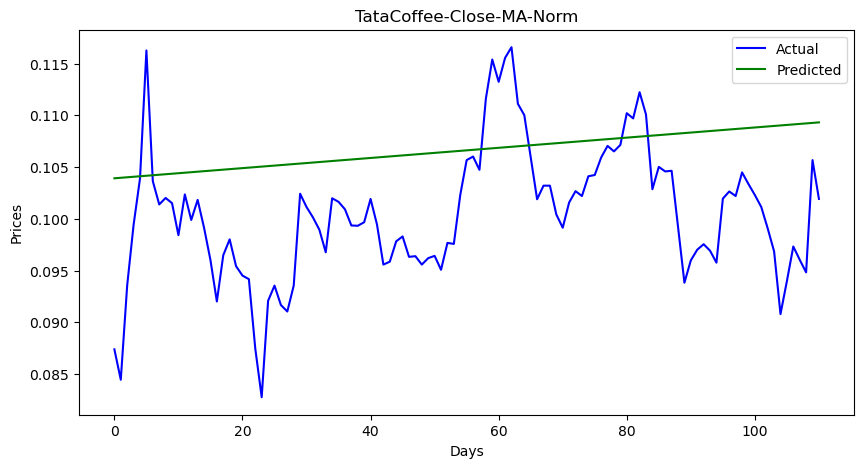

In [22]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [23]:
len(data1)

2225

In [24]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [25]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

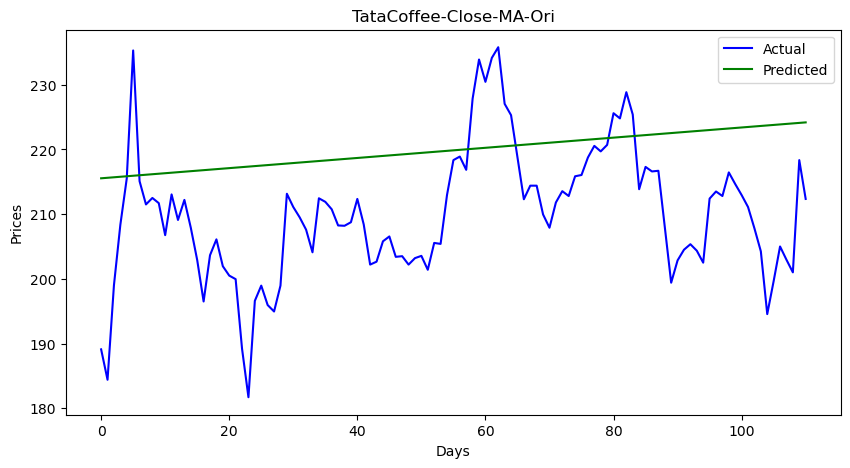

In [26]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [27]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 13.809066285744109
maPe-Testset: 0.05736257826634701


In [28]:
forecast=model_fit.predict(len(data1), len(data1))

In [29]:
forecast

array([0.10936932])

In [30]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [31]:
forecast_stock_price_test_oriF

,Closefore
0,224.259662
